In [2]:
import matplotlib.pyplot as plt

import  torch.utils.data as data_utils
import torch
import torch.nn as nn
from torchvision.models import inception
from torchvision.models import Inception3
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F

from torchvision import datasets,models,transforms
import torch.optim as optim

from os import path
import numpy as np
import random
import gc

import copy
import torch
import numpy as np
from torch.autograd import Variable
import sys
import os
import scipy
import cv2
from PIL import Image
from nndev import model_pip
import data

In [29]:
pat_num = []
count=0
all_im_name = []
for i,j,k in os.walk('/storage/gabriel/VC/Normal_Images/'):
    #print(k)
    count+=1
    if(len(k)>1):
        all_im_name+=k
    for l in k:
        #all_im_name+=k
        #print(k)
        temp = l.find('EQo_')+4
        temp2 = l[temp:].find('_')+temp
        if(l[temp:temp2] not in pat_num):
            
            pat_num.append(l[temp:temp2])


In [30]:
print(pat_num)

['31', '61', '102', '22', '95', '40', '78', '1', '32', '57', '41', '97', '35', '98', '100', '67', '94', '76', '62', '46', '80', '54', '92', '85', '38', '82', '17', '88']


In [31]:
all_im_name

['EQo_31_1_8.jpg',
 'EQo_61_2_3.jpg',
 'EQo_102_9_14.jpg',
 'EQo_22_1_45.jpg',
 'EQo_61_1_48.jpg',
 'EQo_95_9_7.jpg',
 'EQo_40_6_6.jpg',
 'EQo_78_1_23.jpg',
 'EQo_1_1_33.jpg',
 'EQo_32_1_5.jpg',
 'EQo_57_6_29.jpg',
 'EQo_78_13_16.jpg',
 'EQo_41_8_43.jpg',
 'EQo_97_7_44.jpg',
 'EQo_35_6_3.jpg',
 'EQo_102_9_18.jpg',
 'EQo_98_8_29.jpg',
 'EQo_100_2_8.jpg',
 'EQo_41_11_14.jpg',
 'EQo_67_2_53.jpg',
 'EQo_1_1_32.jpg',
 'EQo_95_6_23.jpg',
 'EQo_22_2_7.jpg',
 'EQo_94_6_34.jpg',
 'EQo_98_2_53.jpg',
 'EQo_61_2_62.jpg',
 'EQo_35_6_25.jpg',
 'EQo_1_8_19.jpg',
 'EQo_76_9_15.jpg',
 'EQo_41_2_42.jpg',
 'EQo_97_7_26.jpg',
 'EQo_61_6_36.jpg',
 'EQo_95_2_19.jpg',
 'EQo_41_2_38.jpg',
 'EQo_41_11_10.jpg',
 'EQo_98_8_43.jpg',
 'EQo_94_1_34.jpg',
 'EQo_62_6_31.jpg',
 'EQo_40_2_36.jpg',
 'EQo_67_2_16.jpg',
 'EQo_57_2_34.jpg',
 'EQo_97_3_44.jpg',
 'EQo_46_2_30.jpg',
 'EQo_22_3_29.jpg',
 'EQo_61_1_3.jpg',
 'EQo_95_8_6.jpg',
 'EQo_1_1_6.jpg',
 'EQo_80_1_23.jpg',
 'EQo_102_2_15.jpg',
 'EQo_102_9_21.jpg',
 'EQo_9

In [97]:
import shutil


In [98]:
make_pat_data(data_dir ='/storage/gabriel/VC/Normal_Images/' ,dest_dir ='/storage/gabriel/VC/Normal_Images_New')

In [46]:

num_class = {i:len(os.listdir('/storage/gabriel/VC/Normal_Images/'+i)) for i in os.listdir('/storage/gabriel/VC/Normal_Images/') if '.ipynb' not in i}

In [49]:
print((num_class))

{'A2C': 2743, 'A4C': 4652, 'PLA': 4208}


In [6]:
path = '/storage/gabriel/VC/Normal_Images/'
len_arr = [len(os.listdir(path+i)) for i in os.listdir(path)]

In [7]:
print(len_arr)

[4208, 2743, 4652]


In [8]:
base_num = 10
train_ind = np.random.choice(10,7,replace=False)
left_out = [i for i in np.arange(0,10) if i not in train_ind]
val_ind = np.random.choice(left_out,2,replace=False)
test_ind = [i for i in left_out if i not in val_ind]
#print(left_out)
print(train_ind)
print(val_ind)
print(test_ind)

[8 5 3 7 1 4 9]
[0 2]
[6]


In [ ]:
### samples data into train, test , val
import gc
gc.collect()
for i in range(0,10):
    res = models.resnet18(pretrained=True)
    res.fc = nn.Linear(res.fc.in_features,3)
    #sample_data(eq=True)
    data.make_pat_data(data_dir ='/storage/gabriel/VC/Normal_Images/' ,dest_dir ='/storage/gabriel/VC/Normal_Images_New')
    obj = model_pip(model_in=res,scale=True,batch_size=30,use_gpu=True,data_path='/storage/gabriel/VC/Normal_Images_New/')
    model = obj.train_model(epochs=10)
    obj.store_model(f_name='/storage/gabriel/VC/models/saved_model_new_'+str(i)+'_.pth.tar')
    del(obj)
    #break

here
{'test': 2439, 'train': 8199, 'val': 965}
('Epoch = ', 0)
('lr = ', 0.001)
traintrain Loss: 0.0043 Acc: 0.9543
[[ 1840.   117.    22.]
 [   59.  3150.    69.]
 [   43.    65.  2834.]]
valval Loss: 0.0025 Acc: 0.9855
[[ 255.    3.    0.]
 [   5.  364.    6.]
 [   0.    0.  332.]]
('Epoch = ', 1)
traintrain Loss: 0.0002 Acc: 0.9996
[[  1.97800000e+03   1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   3.27700000e+03   1.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   2.94100000e+03]]
valval Loss: 0.0017 Acc: 0.9855
[[ 250.    8.    0.]
 [   0.  372.    3.]
 [   0.    3.  329.]]
('Epoch = ', 2)
traintrain Loss: 0.0001 Acc: 0.9999
[[  1.97900000e+03   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   3.27700000e+03   1.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   2.94200000e+03]]
valval Loss: 0.0013 Acc: 0.9896
[[ 250.    8.    0.]
 [   0.  373.    2.]
 [   0.    0.  332.]]
('Epoch = ', 3)
traintrain Loss: 0.0001 Acc: 1.0000
[[ 1979.     0.     0.]
 [    0.  3278.  

In [100]:
acc = 0

for i in range(0,10):
    
    res = models.resnet18(pretrained=True)
    res.fc = nn.Linear(res.fc.in_features,3)
    sample_data(eq=True)
    obj = model_pip(model_in=res,scale=True,batch_size=30,use_gpu=True,data_path='/storage/gabriel/VC/diseased/')
    
    obj.load_model(filename='/storage/gabriel/VC/models/saved_model_new_'+str(i)+'_.pth.tar')
    obj.test(model_dir='/storage/gabriel/VC/models/',model_name='saved_model_'+'new_'+str(i)+'_.pth.tar',
             test_on=True,save_miscl = True,random_crop=False)
    
    del(obj)
    
 

here
('test accuracy= ', 0.72670157068062824)
[[ 286.   89.   66.]
 [ 169.  658.  182.]
 [   2.   14.  444.]]
here
('test accuracy= ', 0.76963350785340312)
[[ 251.  150.   40.]
 [ 102.  763.  144.]
 [   0.    4.  456.]]
here
('test accuracy= ', 0.73769633507853405)
[[ 292.   77.   72.]
 [ 102.  665.  242.]
 [   0.    8.  452.]]
here
('test accuracy= ', 0.75340314136125652)
[[ 299.   75.   67.]
 [ 137.  684.  188.]
 [   1.    3.  456.]]
here
('test accuracy= ', 0.75026178010471201)
[[ 261.   99.   81.]
 [ 123.  722.  164.]
 [   0.   10.  450.]]
here
('test accuracy= ', 0.79109947643979062)
[[ 293.  114.   34.]
 [ 142.  773.   94.]
 [   0.   15.  445.]]
here
('test accuracy= ', 0.76178010471204194)
[[ 273.   98.   70.]
 [ 110.  724.  175.]
 [   0.    2.  458.]]
here
('test accuracy= ', 0.77905759162303667)
[[ 268.  108.   65.]
 [  78.  776.  155.]
 [   0.   16.  444.]]
here
('test accuracy= ', 0.75078534031413613)
[[ 254.  137.   50.]
 [ 149.  722.  138.]
 [   0.    2.  458.]]
here
('tes

In [7]:
print(len(os.listdir('/storage/gabriel/VC/dataset/train/PLA')))

2502


In [10]:
os.listdir('/storage/gabriel/VC/dataset/train/')

['.ipynb_checkpoints', 'PLA', 'A2C', 'A4C']

In [3]:

obj = model_pip(model_in=res,scale=True,batch_size=30,use_gpu=True,data_path='/storage/gabriel/VC/dataset/')
#obj1 = model_pip(model_in=res,scale=True,batch_size=100,use_gpu=True,data_path='/storage/gabriel/VC/dataset/')

In [ ]:
#model = obj.train_model(epochs=10)
#a,b,c = obj.transform()

In [5]:
obj.store_model(f_name='/storage/gabriel/VC/models/saved_model.pth.tar')

In [3]:
res = models.resnet18(pretrained=True)
res.fc = nn.Linear(res.fc.in_features,3)


In [ ]:
### make list of used images


In [4]:
obj = model_pip(res,scale=True,use_gpu=True,batch_size=30,data_path='/storage/gabriel/VC/dataset/')
#obj2.train_model()
#obj2.store_model(f_name='/data/gabriel/VC/models/saved_model.pth.tar')
obj.load_model('/storage/gabriel/VC/models/saved_model.pth.tar')

In [6]:
a,b,c = obj.transform()

here


0


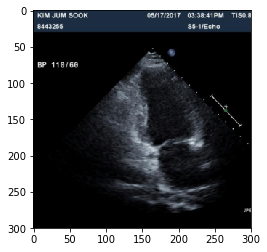

(<matplotlib.image.AxesImage at 0x7fd98ebbeb50>, None)

In [56]:

ind=3000
print(a['train'].__getitem__(ind)[1])
plt.imshow(np.array([0.229,0.224,0.225])*a['train'].__getitem__(ind)[0].numpy().transpose(1,2,0)+np.array([0.485,0.456,0.406])),plt.show()

In [201]:
#help(a)

In [ ]:
used_list = []
train_list = []
test_list = []
val_list = []
used_dir = []
count = 0
for i,j,k in os.walk('/storage/gabriel/VC/dataset/'):
    print(i)
    print(k)
    if(len(k)>0 and '.jpg'in k[0]  ):
        used_list+=k
        
        for l in used_list[count:]:
            used_dir.append(i+'/'+l)
        count+=len(k)
all_set = []
all_dir = []
count = 0
for i,j,k in os.walk('/storage/gabriel/VC/Normal_Images/'):
    
    if(len(k)>0 and '.jpg' in k[0]):
        
        all_set+=k
       
        for l in all_set[count:]:
            #print(l)
            all_dir.append(i+'/'+l)
        count+=len(k)

def find_last(s,q):
    return [i for i,j in enumerate(s) if j==q][-1]
def find_last_two(s,q):
    return [i for i,j in enumerate(s) if j==q][-2:]

for i in all_dir:
    
    if i[find_all(i,'/')+1:] in used_list:
        a+=1
    else:
        left_out.append(i)        
os.system('rm /storage/gabriel/VC/not_dataset/test/PLA/*')
os.system('rm /storage/gabriel/VC/not_dataset/test/A2C/*')
os.system('rm /storage/gabriel/VC/not_dataset/test/A4C/*')
for i in left_out:
    if ('PLA') in i:
        
        shutil.copy(i,'/storage/gabriel/VC/not_dataset/test/PLA/')
    if ('A2C') in i:
        
        shutil.copy(i,'/storage/gabriel/VC/not_dataset/test/A2C/')
    if ('A4C') in i:
        
        shutil.copy(i,'/storage/gabriel/VC/not_dataset/test/A4C/')

#     if(len(k)>0 and 'test' in i):
#         test_list+=k
#     if(len(k)>0 and 'train' in i):
#         train_list+=k
#     if(len(k)>0 and 'val' in i):
#         val_list+=k
    

In [159]:
print(len(test_list))
print(len(train_list))
print(len(val_list)+len(train_list)+len(test_list))
print(len(used_list))

825
5760
8229
8229


In [172]:
print(len(used_dir))

8229


In [173]:
print(used_dir[0])

/storage/gabriel/VC/dataset/test/PLA/EQo_32_1_5.jpg


In [88]:
used_set = set(used_list)
val_set = set(val_list)
train_set = set(train_list)
test_set = set(test_list)

In [94]:
print(val_set.intersection(train_set))
print(test_set.intersection(train_set))
print(test_set.intersection(val_set))

set([])
set([])
set([])


In [160]:
all_set = []
all_dir = []
count = 0
for i,j,k in os.walk('/storage/gabriel/VC/Normal_Images/'):
    
    if(len(k)>0 and '.jpg' in k[0]):
        
        all_set+=k
       
        for l in all_set[count:]:
            #print(l)
            all_dir.append(i+'/'+l)
        count+=len(k)

In [162]:
print(len(os.listdir('/storage/gabriel/VC/Normal_Images/A4C')))
print(len(os.listdir('/storage/gabriel/VC/Normal_Images/PLA')))
print(len(os.listdir('/storage/gabriel/VC/Normal_Images/A2C')))

4652
4208
2743


In [161]:
print(4652+4208+2743)
print(len(all_dir))

11603
11603


In [163]:
print(len(used_dir))


8229


In [174]:
print(all_dir[0])

/storage/gabriel/VC/Normal_Images/PLA/EQo_31_1_8.jpg


In [175]:
print(used_dir[0])

/storage/gabriel/VC/dataset/test/PLA/EQo_32_1_5.jpg


In [197]:
#print(used_list)

In [189]:
print(i[find_all(i,'/')+1:])

EQo_22_42_53.jpg


In [191]:
if ('EQo_22_42_53.jpg' in used_list):
    print 'aa'

In [190]:
print(used_list[0])

EQo_32_1_5.jpg


In [193]:
left_out = []
a=1
def find_last(s,q):
    return [i for i,j in enumerate(s) if j==q][-1]
def find_last_two(s,q):
    return [i for i,j in enumerate(s) if j==q][-2:]

for i in all_dir:
    
    if i[find_all(i,'/')+1:] in used_list:
        a+=1
    else:
        #print(i[find_all(i,'/')+1:])
        left_out.append(i)
print(len(left_out))
print(len(all_dir))

3374
11603


In [199]:
import shutil
for i in left_out:
    if ('PLA') in i:
        
        shutil.copy(i,'/storage/gabriel/VC/not_dataset/test/PLA/')
    if ('A2C') in i:
        
        shutil.copy(i,'/storage/gabriel/VC/not_dataset/test/A2C/')
    if ('A4C') in i:
        
        shutil.copy(i,'/storage/gabriel/VC/not_dataset/test/A4C/')
                  

In [196]:
print(len(used_dir)+len(left_out))

11603


In [200]:
#print(tt)

In [115]:
#print(all_dir)

In [99]:

#print(all_set)

In [100]:
#print(used_list)

In [ ]:
res = models.resnet18(pretrained=True)
res.fc = nn.Linear(res.fc.in_features,3)
obj = model_pip(res,use_gpu=True,batch_size=3,data_path='/storage/gabriel/VC/dataset/',scale=False
               )
#obj2.train_model()
#obj2.store_model(f_name='/data/gabriel/VC/models/saved_model.pth.tar')
#obj.load_model('/storage/gabriel/VC/models/saved_model.pth.tar',)

In [1]:
a = '111.2'
a[:a.find('.2')]

'111'

In [ ]:
obj.train_model(epochs=30)
obj.store_model(f_name='/data/gabriel/VC/models/saved_model_big.pth.tar')

here2
{'test': 825, 'train': 5760, 'val': 1644}
('Epoch = ', 0)
('lr = ', 0.001)


In [3]:
obj.test(model_dir='/storage/gabriel/VC/models/',n=None,test_on=True)

(3, 3)
('test accuracy= ', 0.99347954949614703)
[[    0.     0.     0.]
 [    8.  1891.    10.]
 [    2.     2.  1461.]]


In [9]:
c

{'test': 825, 'train': 5760, 'val': 1644}

In [5]:
obj.test(model_dir='/storage/gabriel/VC/models/',n=None)

('test accuracy= ', 0.99272727272727268)
[[ 272.    3.    0.]
 [   1.  272.    2.]
 [   0.    0.  275.]]


In [ ]:
for i,j in (b['train']):
    print(i.size())
    print(j.size())
    break

In [7]:
print(11000/(80*2000))

0


In [ ]:
res = models.resnet18(pretrained=True)
res.fc = nn.Linear(res.fc.in_features,3)
obj = model_pip(res,scale=True,use_gpu=True,batch_size=,data_path='/storage/gabriel/VC/not_dataset/')
#obj2.train_model()
#obj2.store_model(f_name='/data/gabriel/VC/models/saved_model.pth.tar')
obj.load_model('/storage/gabriel/VC/models/saved_model.pth.tar',)